<a href="https://colab.research.google.com/github/zafe312/car_recommender/blob/main/car_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI clustering to recommend cars based on user input


1.   Create dataset
2.   Test out different clustering algo



## Create random dataset

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
# Features of each datapoint
columns = ['id', 'Listed Name', 'Condition', 'Make', 'Model', 'Body', 'Mileage', 'Month', 'Year', 'Price', 'Length', 'Width', 'Height', 'Ground clearance', 'Seats', 
           'Global NCAP', 'Fuel type', 'Engine', 'Displacement', 'Cylinder', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color', 'Unladen weight', 
           'Gross vehicle weight', 'Location', 'Latitude', 'Longitude']

In [3]:
id = [1000 + i for i in range(1,500)]
Condition = ['New', 'Used', 'Certified']
Make = ['Hyundai', 'Tata', 'Mahindra', 'Nissan', 'Toyota', 'Kia', 'Ford', 'Chevrolet', 'Honda', 'Maruti Suzuki', 'Renault']
Model = ['A','B','C']
Body = ['Hatchback', 'SUV', 'CUV', 'MUV', 'Sedan', 'Minivan', 'Convertible', 'Coupe', 'Off-road']
Month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Year = [2005 + i for i in range(18)]
price_min = 300000
price_max = 2200000
Seats = [5,6,7,8,10]
Ncap = [0,1,2,3,4,5]
Fuel = ['Petrol', 'Diesel', 'Electric', 'Hybrid']
Cylinder = [3,4,5]
Transmission = ['Automatic', 'Semi-automatic', 'Manual']
Drive = ['FWD', 'BWD', '4WD']
Ext_color = ['White', 'Red', 'Black', 'Brown', 'Silver', 'Green', 'Biege']
Int_color = ['Grey', 'Silver', 'Brown', 'Red']

In [4]:
# Create DataFrame
df = pd.DataFrame(columns=columns)

# Generate random data 
for i in id:
  condition = random.choice(Condition)
  make = random.choice(Make)
  model = random.choice(Model)
  year = random.choice(Year)
  listed_name = f'{condition} {year} {make} {model}'
  body = random.choice(Body)
  mileage = random.randint(2000,100000)
  month = random.choice(Month)
  price = random.randint(price_min,price_max)
  length = random.randint(1000,1500)
  width = random.randint(800,1000)
  height = random.randint(600,1000)
  gd_clearance = random.randint(100,200)
  seats = random.choice(Seats)
  ncap = random.choice(Ncap)
  fuel = random.choice(Fuel)
  engine = random.randint(1,10)
  displacement = random.randint(1000,1500)
  cylinder = random.choice(Cylinder)
  transmission = random.choice(Transmission)
  drive = random.choice(Drive)
  ext_color = random.choice(Ext_color)
  int_color = random.choice(Int_color)
  un_weight = random.randint(1000,2000)
  gross_weight = un_weight + random.randint(50, 100)
  location = random.randint(183773,799382)
  lat = random.uniform(80,127)
  lon = random.uniform(68,97)


  car = [i, listed_name, condition, make, model, body, mileage, month, year, price, length, width, height, 
         gd_clearance, seats, ncap, fuel, engine, displacement, cylinder, transmission, drive, ext_color, 
         int_color, un_weight, gross_weight, location, lat, lon]
  df = pd.DataFrame(np.insert(df.values, len(df.index), values=car, axis=0))

df.columns = columns
df = df.set_index('id')
df.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2006 Nissan C,Used,Nissan,C,Convertible,93360,Aug,2006,1737545,1369,885,933,155,8,1,Petrol,3,1037,4,Automatic,FWD,Silver,Grey,1795,1872,267721,92.2689,69.1001
1002,Certified 2009 Mahindra B,Certified,Mahindra,B,Sedan,40526,Sep,2009,1571780,1371,987,904,104,8,0,Electric,3,1392,5,Manual,BWD,Red,Grey,1157,1255,268290,119.659,71.934
1003,Used 2007 Hyundai C,Used,Hyundai,C,Minivan,19152,May,2007,697152,1156,840,910,124,10,5,Electric,9,1114,4,Semi-automatic,FWD,White,Red,1493,1548,518435,120.034,82.2603
1004,New 2014 Renault B,New,Renault,B,Off-road,32706,Feb,2014,1282022,1157,922,784,145,8,3,Petrol,1,1406,4,Semi-automatic,FWD,Black,Red,1725,1787,638087,82.7782,78.6895
1005,Used 2007 Hyundai A,Used,Hyundai,A,Convertible,61184,Oct,2007,365495,1320,855,858,111,8,0,Hybrid,6,1178,4,Manual,FWD,Biege,Silver,1126,1184,297436,84.3878,73.1316


## Visualization

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df.describe()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
count,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499,499.000000,499.000000
unique,433,3,11,3,9,498,12,18,499,315,177,300,100,5,6,4,10,315,3,3,3,7,4,396,396,498,499.000000,499.000000
top,New 2017 Kia C,Used,Maruti Suzuki,B,Hatchback,92990,Aug,2018,1964030,1419,936,933,104,10,2,Electric,5,1013,5,Automatic,4WD,Red,Grey,1649,1804,331322,112.834076,77.984261
freq,3,170,55,199,66,2,57,34,1,6,8,6,11,104,95,130,59,5,178,183,176,81,139,4,4,2,1.000000,1.000000


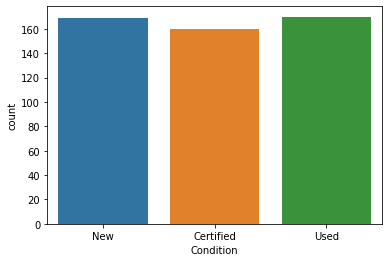

In [7]:
sns.countplot(x = df['Condition'])
plt.show()

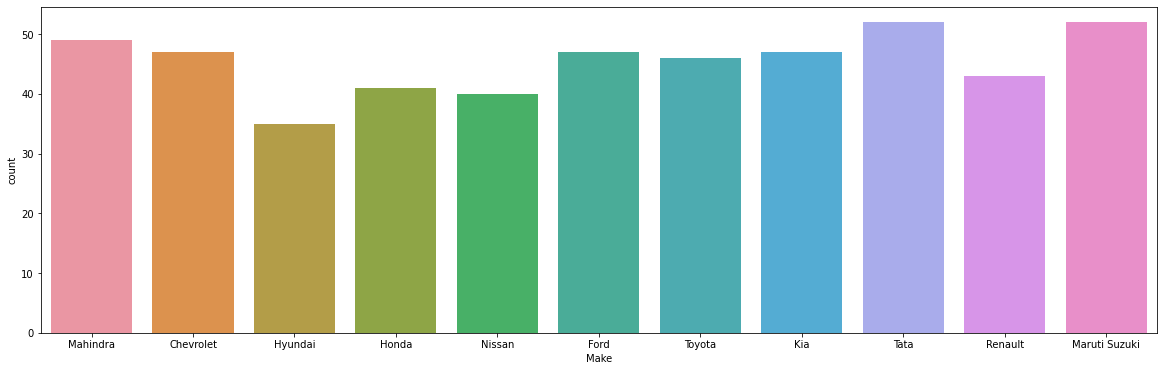

In [8]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Make'])
plt.show()

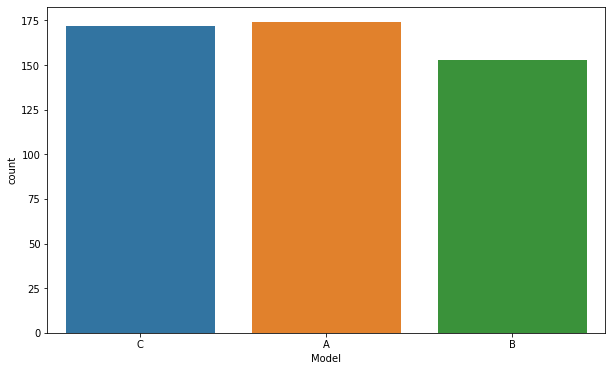

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Model'])
plt.show()

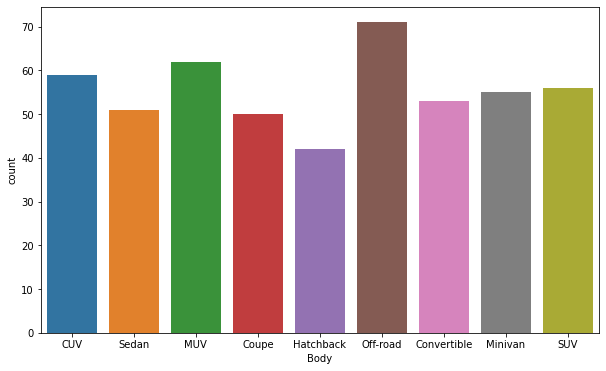

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Body'])
plt.show()

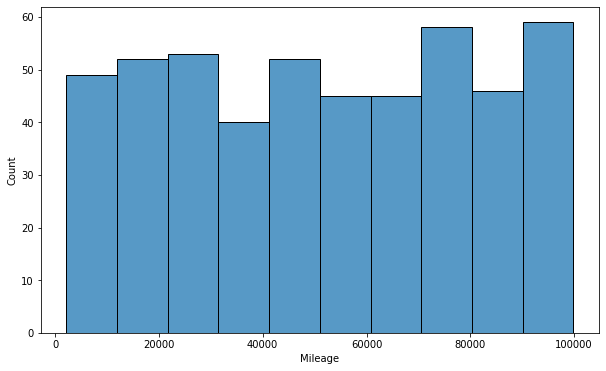

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Mileage'])
plt.show()

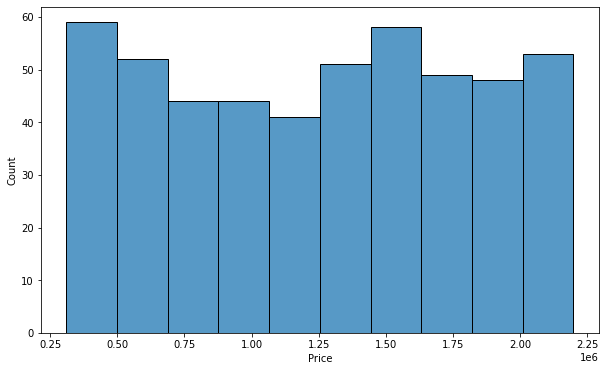

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Price'])
plt.show()

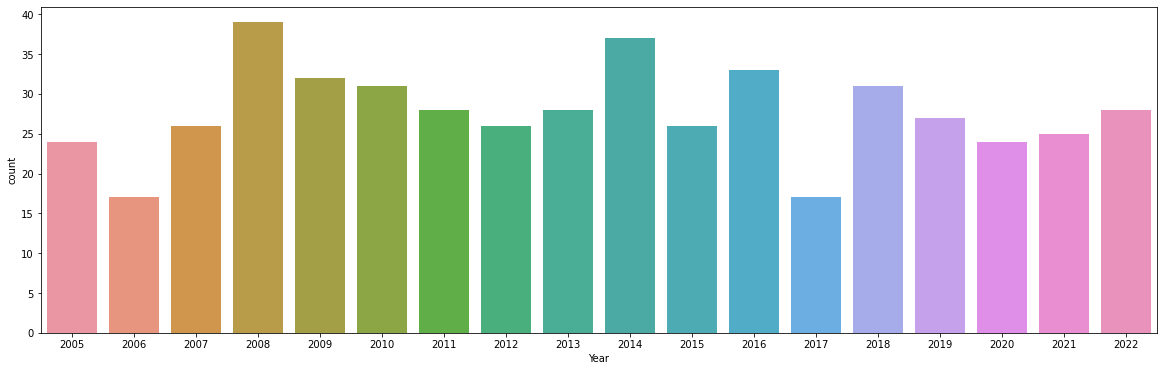

In [13]:
plt.figure(figsize=(20,6))
sns.countplot(x = df['Year'])
plt.show()

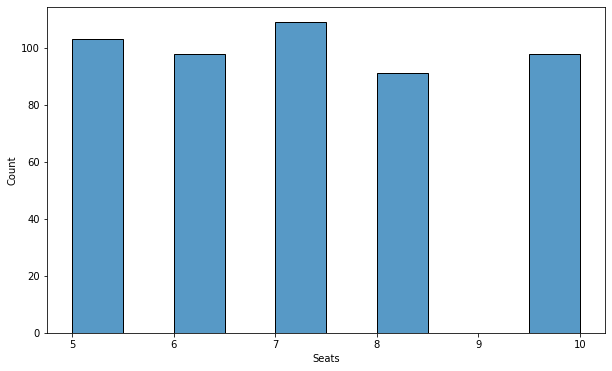

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x = df['Seats'])
plt.show()

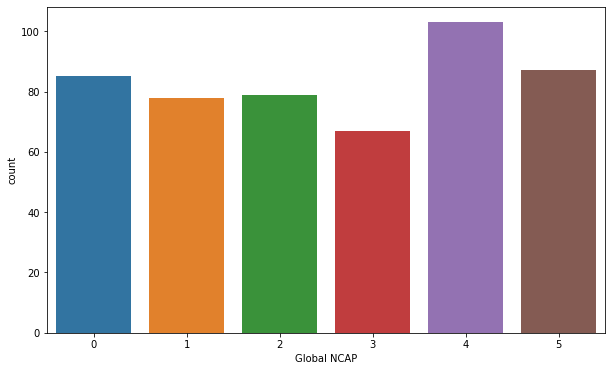

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Global NCAP'])
plt.show()

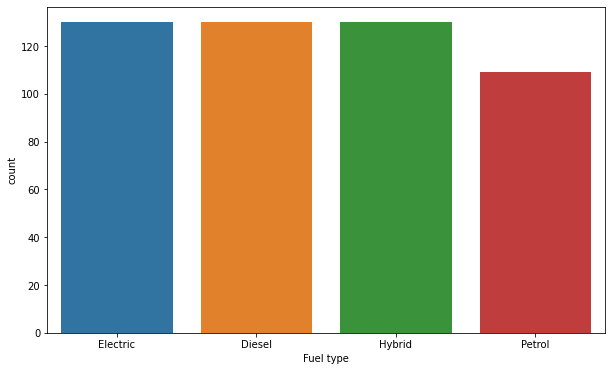

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Fuel type'])
plt.show()

## Feature Engineering

In [7]:
# Make a copy of the data
df1 = df.copy(deep=True)
df1.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2006 Nissan C,Used,Nissan,C,Convertible,93360,Aug,2006,1737545,1369,885,933,155,8,1,Petrol,3,1037,4,Automatic,FWD,Silver,Grey,1795,1872,267721,92.2689,69.1001
1002,Certified 2009 Mahindra B,Certified,Mahindra,B,Sedan,40526,Sep,2009,1571780,1371,987,904,104,8,0,Electric,3,1392,5,Manual,BWD,Red,Grey,1157,1255,268290,119.659,71.934
1003,Used 2007 Hyundai C,Used,Hyundai,C,Minivan,19152,May,2007,697152,1156,840,910,124,10,5,Electric,9,1114,4,Semi-automatic,FWD,White,Red,1493,1548,518435,120.034,82.2603
1004,New 2014 Renault B,New,Renault,B,Off-road,32706,Feb,2014,1282022,1157,922,784,145,8,3,Petrol,1,1406,4,Semi-automatic,FWD,Black,Red,1725,1787,638087,82.7782,78.6895
1005,Used 2007 Hyundai A,Used,Hyundai,A,Convertible,61184,Oct,2007,365495,1320,855,858,111,8,0,Hybrid,6,1178,4,Manual,FWD,Biege,Silver,1126,1184,297436,84.3878,73.1316


In [8]:
# Convert to lower case
for i in ['Condition', 'Make', 'Model', 'Body', 'Month', 'Fuel type', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color']:
  df1[i] = df1[i].str.lower()

df1.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2006 Nissan C,used,nissan,c,convertible,93360,aug,2006,1737545,1369,885,933,155,8,1,petrol,3,1037,4,automatic,fwd,silver,grey,1795,1872,267721,92.2689,69.1001
1002,Certified 2009 Mahindra B,certified,mahindra,b,sedan,40526,sep,2009,1571780,1371,987,904,104,8,0,electric,3,1392,5,manual,bwd,red,grey,1157,1255,268290,119.659,71.934
1003,Used 2007 Hyundai C,used,hyundai,c,minivan,19152,may,2007,697152,1156,840,910,124,10,5,electric,9,1114,4,semi-automatic,fwd,white,red,1493,1548,518435,120.034,82.2603
1004,New 2014 Renault B,new,renault,b,off-road,32706,feb,2014,1282022,1157,922,784,145,8,3,petrol,1,1406,4,semi-automatic,fwd,black,red,1725,1787,638087,82.7782,78.6895
1005,Used 2007 Hyundai A,used,hyundai,a,convertible,61184,oct,2007,365495,1320,855,858,111,8,0,hybrid,6,1178,4,manual,fwd,biege,silver,1126,1184,297436,84.3878,73.1316


In [9]:
print(df1.columns)

Index(['Listed Name', 'Condition', 'Make', 'Model', 'Body', 'Mileage', 'Month',
       'Year', 'Price', 'Length', 'Width', 'Height', 'Ground clearance',
       'Seats', 'Global NCAP', 'Fuel type', 'Engine', 'Displacement',
       'Cylinder', 'Transmission', 'Drive', 'Exterior Color', 'Interior Color',
       'Unladen weight', 'Gross vehicle weight', 'Location', 'Latitude',
       'Longitude'],
      dtype='object')


In [10]:
# Extract tokens for suitable features from the data
columns = list(df1.columns)

Listed_name = list(set(df1['Listed Name']))
Condition = list(set(df1['Condition']))
Make = list(set(df1['Make']))
Model = list(set(df1['Model']))
Body = list(set(df1['Body']))
Month = list(set(df1['Month']))
Fuel_type = list(set(df1['Fuel type']))
Transmission = list(set(df1['Transmission']))
Drive = list(set(df1['Drive']))
Ext_color = list(set(df1['Exterior Color']))
Int_color = list(set(df1['Interior Color']))

In [11]:
df2 = df1.copy(deep=True)
df2.rename(columns = {'Fuel type':'Fuel_type'}, inplace = True)
df2.rename(columns = {'Exterior Color':'Exterior_color'}, inplace = True)
df2.rename(columns = {'Interior Color':'Interior_color'}, inplace = True)


# Features to be tokenized
tokenized_features = ['Condition', 'Make', 'Model', 'Body', 'Month', 'Fuel_type', 'Transmission', 'Drive', 'Exterior_color', 'Interior_color']

# Vectorize Condition column
df2 = df2.assign(new=lambda x: 1*(x.Condition == 'new'))
df2 = df2.assign(used=lambda x: 1*(x.Condition == 'used'))
df2 = df2.assign(certified=lambda x: 1*(x.Condition == 'certified'))

# Vectorize Make column
df2 = df2.assign(kia=lambda x: 1*(x.Make == 'kia'))
df2 = df2.assign(nissan=lambda x: 1*(x.Make == 'nissan'))
df2 = df2.assign(honda=lambda x: 1*(x.Make == 'honda'))
df2 = df2.assign(maruti=lambda x: 1*(x.Make == 'maruti suzuki'))
df2 = df2.assign(chevrolet=lambda x: 1*(x.Make == 'chevrolet'))
df2 = df2.assign(ford=lambda x: 1*(x.Make == 'ford'))
df2 = df2.assign(hyundai=lambda x: 1*(x.Make == 'hyundai'))
df2 = df2.assign(renault=lambda x: 1*(x.Make == 'renault'))
df2 = df2.assign(mahindra=lambda x: 1*(x.Make == 'mahindra'))
df2 = df2.assign(toyota=lambda x: 1*(x.Make == 'toyota'))
df2 = df2.assign(tata=lambda x: 1*(x.Make == 'tata'))

# Vectorize Model column
df2 = df2.assign(a=lambda x: 1*(x.Model == 'a'))
df2 = df2.assign(b=lambda x: 1*(x.Model == 'b'))
df2 = df2.assign(c=lambda x: 1*(x.Model == 'c'))

# Vectorize Body column
df2 = df2.assign(muv=lambda x: 1*(x.Body == 'muv'))
df2 = df2.assign(convertible=lambda x: 1*(x.Body == 'convertible'))
df2 = df2.assign(minivan=lambda x: 1*(x.Body == 'minivan'))
df2 = df2.assign(cuv=lambda x: 1*(x.Body == 'cuv'))
df2 = df2.assign(hatchback=lambda x: 1*(x.Body == 'hatchback'))
df2 = df2.assign(suv=lambda x: 1*(x.Body == 'suv'))
df2 = df2.assign(sedan=lambda x: 1*(x.Body == 'sedan'))
df2 = df2.assign(coupe=lambda x: 1*(x.Body == 'coupe'))
df2 = df2.assign(off_road=lambda x: 1*(x.Body == 'off-road'))

# Vectorize Month column
df2 = df2.assign(jan=lambda x: 1*(x.Month == 'jan'))
df2 = df2.assign(feb=lambda x: 1*(x.Month == 'feb'))
df2 = df2.assign(mar=lambda x: 1*(x.Month == 'mar'))
df2 = df2.assign(apr=lambda x: 1*(x.Month == 'apr'))
df2 = df2.assign(may=lambda x: 1*(x.Month == 'may'))
df2 = df2.assign(jun=lambda x: 1*(x.Month == 'jun'))
df2 = df2.assign(jul=lambda x: 1*(x.Month == 'jul'))
df2 = df2.assign(aug=lambda x: 1*(x.Month == 'aug'))
df2 = df2.assign(sep=lambda x: 1*(x.Month == 'sep'))
df2 = df2.assign(oct=lambda x: 1*(x.Month == 'oct'))
df2 = df2.assign(nov=lambda x: 1*(x.Month == 'nov'))
df2 = df2.assign(dec=lambda x: 1*(x.Month == 'dec'))

# Vectorize Fuel type column
df2 = df2.assign(petrol=lambda x: 1*(x.Fuel_type == 'petrol'))
df2 = df2.assign(diesel=lambda x: 1*(x.Fuel_type == 'diesel'))
df2 = df2.assign(electric=lambda x: 1*(x.Fuel_type == 'electric'))
df2 = df2.assign(hybrid=lambda x: 1*(x.Fuel_type == 'hybrid'))

# Vectorize Transmission column
df2 = df2.assign(automatic=lambda x: 1*(x.Transmission == 'automatic'))
df2 = df2.assign(semi_automatic=lambda x: 1*(x.Transmission == 'semi-automatic'))
df2 = df2.assign(manual=lambda x: 1*(x.Transmission == 'manual'))

# Vectorize Drive column
df2 = df2.assign(fwd=lambda x: 1*(x.Drive == 'fwd'))
df2 = df2.assign(bwd=lambda x: 1*(x.Drive == 'bwd'))
df2 = df2.assign(awd=lambda x: 1*(x.Drive == '4wd'))

# Vectorize Exterior Color column
df2 = df2.assign(e_white=lambda x: 1*(x.Exterior_color == 'white'))
df2 = df2.assign(e_biege=lambda x: 1*(x.Exterior_color == 'biege'))
df2 = df2.assign(e_brown=lambda x: 1*(x.Exterior_color == 'brown'))
df2 = df2.assign(e_siler=lambda x: 1*(x.Exterior_color == 'silver'))
df2 = df2.assign(e_black=lambda x: 1*(x.Exterior_color == 'black'))
df2 = df2.assign(e_green=lambda x: 1*(x.Exterior_color == 'green'))
df2 = df2.assign(e_red=lambda x: 1*(x.Exterior_color == 'red'))

# Vectorize Interior Color column
df2 = df2.assign(i_grey=lambda x: 1*(x.Interior_color == 'grey'))
df2 = df2.assign(i_silver=lambda x: 1*(x.Interior_color == 'silver'))
df2 = df2.assign(i_red=lambda x: 1*(x.Interior_color == 'red'))
df2 = df2.assign(i_brown=lambda x: 1*(x.Interior_color == 'brown'))

# Drop tokenized features
df2 = df2.drop(tokenized_features, 1)
df2 = df2.drop('Listed Name', 1)
df2.head()

,Mileage,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Engine,Displacement,Cylinder,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,new,used,certified,kia,nissan,honda,maruti,chevrolet,ford,hyundai,renault,mahindra,toyota,tata,a,b,c,muv,convertible,minivan,cuv,hatchback,suv,sedan,coupe,off_road,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,petrol,diesel,electric,hybrid,automatic,semi_automatic,manual,fwd,bwd,awd,e_white,e_biege,e_brown,e_siler,e_black,e_green,e_red,i_grey,i_silver,i_red,i_brown
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,93360,2006,1737545,1369,885,933,155,8,1,3,1037,4,1795,1872,267721,92.2689,69.1001,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0
1002,40526,2009,1571780,1371,987,904,104,8,0,3,1392,5,1157,1255,268290,119.659,71.934,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0
1003,19152,2007,697152,1156,840,910,124,10,5,9,1114,4,1493,1548,518435,120.034,82.2603,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1004,32706,2014,1282022,1157,922,784,145,8,3,1,1406,4,1725,1787,638087,82.7782,78.6895,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
1005,61184,2007,365495,1320,855,858,111,8,0,6,1178,4,1126,1184,297436,84.3878,73.1316,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0


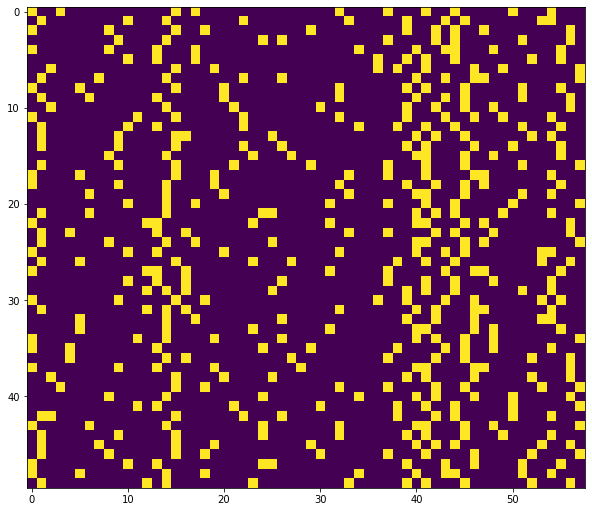

In [12]:
# Visualize the sparse matrix
plt.figure(figsize=(10,10))
plt.imshow(df2.iloc[:50,18:])
plt.show()

## K-Means

In [13]:
from sklearn.cluster import MiniBatchKMeans

# Initialize KMeans model
kmeans = MiniBatchKMeans(n_clusters = 10)

# Fit the model to the training data
kmeans.fit(df2)

MiniBatchKMeans(n_clusters=10)

In [15]:
Cluster = kmeans.labels_
Cluster

array([2, 2, 8, 9, 6, 4, 2, 8, 1, 5, 8, 6, 5, 8, 3, 6, 0, 0, 6, 2, 4, 5,
       3, 1, 6, 0, 7, 1, 8, 7, 1, 5, 9, 6, 0, 0, 8, 1, 5, 3, 8, 4, 6, 3,
       6, 4, 2, 6, 5, 6, 0, 0, 9, 8, 2, 1, 8, 7, 6, 2, 3, 8, 1, 4, 9, 8,
       6, 7, 9, 8, 7, 4, 3, 0, 2, 8, 3, 2, 6, 4, 9, 7, 6, 5, 1, 1, 8, 5,
       5, 4, 2, 1, 5, 6, 1, 4, 1, 5, 0, 2, 9, 5, 0, 4, 2, 6, 9, 4, 5, 8,
       3, 4, 0, 0, 2, 4, 1, 9, 5, 8, 5, 6, 4, 9, 6, 2, 4, 7, 5, 5, 4, 5,
       2, 7, 5, 1, 6, 8, 4, 0, 7, 8, 6, 4, 0, 9, 8, 1, 9, 9, 8, 2, 4, 6,
       2, 1, 8, 8, 6, 5, 3, 8, 8, 5, 5, 3, 4, 2, 3, 7, 1, 5, 3, 4, 8, 3,
       4, 1, 5, 9, 9, 6, 5, 4, 1, 0, 9, 4, 1, 5, 4, 6, 3, 2, 4, 0, 0, 1,
       9, 4, 0, 2, 9, 4, 7, 1, 0, 4, 6, 3, 3, 9, 6, 9, 3, 9, 5, 4, 7, 1,
       0, 6, 0, 4, 2, 6, 9, 1, 4, 5, 2, 7, 3, 5, 1, 0, 4, 8, 2, 4, 3, 3,
       6, 1, 7, 4, 6, 0, 7, 5, 8, 8, 0, 9, 0, 0, 9, 6, 7, 4, 1, 0, 1, 9,
       1, 5, 9, 6, 4, 3, 2, 1, 5, 2, 7, 0, 7, 3, 0, 3, 0, 5, 1, 9, 2, 9,
       5, 0, 8, 6, 8, 6, 7, 6, 8, 1, 7, 8, 8, 2, 2,

## Prepare clustered dataset

In [16]:
df3 = df.copy(deep=True)
df3 = df3.assign(Cluster=Cluster)
df3.head()

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,Cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2006 Nissan C,Used,Nissan,C,Convertible,93360,Aug,2006,1737545,1369,885,933,155,8,1,Petrol,3,1037,4,Automatic,FWD,Silver,Grey,1795,1872,267721,92.2689,69.1001,2
1002,Certified 2009 Mahindra B,Certified,Mahindra,B,Sedan,40526,Sep,2009,1571780,1371,987,904,104,8,0,Electric,3,1392,5,Manual,BWD,Red,Grey,1157,1255,268290,119.659,71.934,2
1003,Used 2007 Hyundai C,Used,Hyundai,C,Minivan,19152,May,2007,697152,1156,840,910,124,10,5,Electric,9,1114,4,Semi-automatic,FWD,White,Red,1493,1548,518435,120.034,82.2603,8
1004,New 2014 Renault B,New,Renault,B,Off-road,32706,Feb,2014,1282022,1157,922,784,145,8,3,Petrol,1,1406,4,Semi-automatic,FWD,Black,Red,1725,1787,638087,82.7782,78.6895,9
1005,Used 2007 Hyundai A,Used,Hyundai,A,Convertible,61184,Oct,2007,365495,1320,855,858,111,8,0,Hybrid,6,1178,4,Manual,FWD,Biege,Silver,1126,1184,297436,84.3878,73.1316,6


In [26]:
total = 0
for i in range(0,10):
  rows = df3[df3['Cluster']==i].shape[0]
  total += rows
  print(f"Entries in cluster {i}: {rows}")
print(f'Total = {total}')

Entries in cluster 0: 46
Entries in cluster 1: 55
Entries in cluster 2: 46
Entries in cluster 3: 41
Entries in cluster 4: 57
Entries in cluster 5: 58
Entries in cluster 6: 54
Entries in cluster 7: 39
Entries in cluster 8: 55
Entries in cluster 9: 48
Total = 499


In [30]:
df3[df3['Cluster']==0]

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,Cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1017,Certified 2017 Renault C,Certified,Renault,C,SUV,64093,May,2017,522512,1485,925,848,113,5,2,Petrol,8,1433,4,Automatic,BWD,Black,Brown,1371,1439,344662,105.478,95.8527,0
1018,Used 2011 Maruti Suzuki C,Used,Maruti Suzuki,C,CUV,73666,Sep,2011,747060,1252,916,912,104,10,3,Petrol,3,1399,3,Automatic,4WD,White,Grey,1575,1626,248009,110.28,72.3341,0
1026,Used 2007 Mahindra A,Used,Mahindra,A,Hatchback,38708,Aug,2007,476845,1065,922,780,196,7,1,Hybrid,1,1160,5,Manual,BWD,Red,Grey,1947,1999,214782,101.1,89.3221,0
1035,Used 2018 Toyota B,Used,Toyota,B,CUV,75287,Feb,2018,500165,1357,893,931,116,10,2,Hybrid,5,1465,4,Semi-automatic,BWD,Biege,Brown,1036,1123,285341,86.0336,81.4891,0
1036,Used 2016 Honda A,Used,Honda,A,Off-road,70199,May,2016,798167,1276,937,762,120,10,1,Diesel,2,1098,5,Manual,BWD,Biege,Grey,1074,1127,278329,124.357,80.5715,0
1051,Certified 2015 Tata A,Certified,Tata,A,Coupe,16137,Feb,2015,662438,1054,992,720,147,7,2,Petrol,7,1275,5,Manual,4WD,Black,Red,1735,1826,372654,100.667,80.9291,0
1052,Used 2012 Tata C,Used,Tata,C,Coupe,31355,Sep,2012,898869,1110,944,824,169,6,1,Electric,5,1372,5,Automatic,FWD,Brown,Grey,1568,1648,273594,106.266,71.2224,0
1074,Certified 2014 Ford C,Certified,Ford,C,Minivan,87964,Jan,2014,553155,1343,823,684,196,8,1,Electric,2,1372,4,Semi-automatic,FWD,Green,Red,1169,1262,381274,87.9105,71.584,0
1099,New 2009 Nissan B,New,Nissan,B,Minivan,4816,Aug,2009,516212,1358,824,782,115,10,0,Diesel,8,1414,3,Manual,4WD,Brown,Grey,1719,1782,334256,101.428,70.3081,0


In [31]:
df3[df3['Cluster']==1]

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,Cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1009,Used 2019 Maruti Suzuki C,Used,Maruti Suzuki,C,Hatchback,62982,Aug,2019,1519663,1127,907,824,132,6,1,Electric,1,1173,3,Automatic,BWD,Black,Silver,1584,1635,517646,124.294,80.1383,1
1024,Certified 2016 Honda A,Certified,Honda,A,MUV,58469,Sep,2016,1561669,1065,955,803,134,5,1,Petrol,4,1492,5,Semi-automatic,FWD,Biege,Red,1444,1503,655992,106.337,88.6092,1
1028,Used 2020 Tata A,Used,Tata,A,MUV,84324,Jul,2020,1837419,1166,961,685,138,7,5,Petrol,3,1435,4,Manual,4WD,White,Silver,1411,1491,522977,82.2511,77.5784,1
1031,Used 2018 Renault C,Used,Renault,C,Minivan,79118,Dec,2018,1651937,1385,970,1000,143,6,2,Electric,10,1333,3,Manual,4WD,Red,Silver,1254,1339,591146,88.7817,84.0009,1
1038,Used 2012 Renault A,Used,Renault,A,CUV,99067,Apr,2012,1702992,1014,884,807,107,6,5,Hybrid,3,1376,3,Automatic,4WD,White,Red,1922,1993,680210,114.233,71.3783,1
1056,Certified 2013 Nissan C,Certified,Nissan,C,Coupe,87801,Oct,2013,1665763,1043,855,984,174,10,0,Petrol,7,1336,4,Semi-automatic,4WD,White,Grey,1188,1267,488034,80.552,70.2286,1
1063,Used 2013 Chevrolet A,Used,Chevrolet,A,Minivan,79735,Apr,2013,1657180,1107,809,662,123,10,2,Electric,2,1188,4,Semi-automatic,4WD,Black,Red,1631,1681,501711,99.7054,69.4762,1
1085,New 2013 Chevrolet A,New,Chevrolet,A,Coupe,18569,Jan,2013,1513674,1288,905,771,119,7,5,Petrol,5,1207,5,Manual,4WD,White,Grey,1241,1311,585899,104.621,82.6589,1
1086,New 2014 Kia A,New,Kia,A,Hatchback,36417,Mar,2014,1574480,1475,981,964,101,5,1,Petrol,5,1499,5,Manual,4WD,Green,Brown,1527,1587,540915,88.4042,76.8189,1


In [32]:
df3[df3['Cluster']==2]

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,Cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1001,Used 2006 Nissan C,Used,Nissan,C,Convertible,93360,Aug,2006,1737545,1369,885,933,155,8,1,Petrol,3,1037,4,Automatic,FWD,Silver,Grey,1795,1872,267721,92.2689,69.1001,2
1002,Certified 2009 Mahindra B,Certified,Mahindra,B,Sedan,40526,Sep,2009,1571780,1371,987,904,104,8,0,Electric,3,1392,5,Manual,BWD,Red,Grey,1157,1255,268290,119.659,71.934,2
1007,New 2008 Kia C,New,Kia,C,CUV,9682,Dec,2008,1578271,1321,825,935,118,7,1,Diesel,6,1240,4,Automatic,4WD,Brown,Brown,1748,1804,402324,85.6066,69.7248,2
1020,New 2013 Chevrolet B,New,Chevrolet,B,Hatchback,42344,Sep,2013,1667562,1331,949,690,191,5,4,Hybrid,9,1320,4,Automatic,BWD,Black,Grey,1119,1173,288515,85.081,69.7743,2
1047,Certified 2022 Hyundai C,Certified,Hyundai,C,Minivan,50966,Jun,2022,1522936,1072,895,629,167,8,1,Petrol,8,1460,3,Automatic,4WD,Green,Brown,1232,1298,479389,90.4387,70.841,2
1055,Certified 2013 Maruti Suzuki B,Certified,Maruti Suzuki,B,SUV,42242,Aug,2013,1576499,1115,919,901,144,7,2,Electric,10,1270,5,Semi-automatic,FWD,Red,Grey,1613,1713,478255,99.6571,93.4422,2
1060,New 2014 Nissan B,New,Nissan,B,Off-road,58578,Feb,2014,1510424,1052,947,639,189,7,1,Petrol,8,1323,5,Semi-automatic,4WD,Silver,Brown,1989,2068,429664,112.25,85.4946,2
1075,Certified 2015 Tata B,Certified,Tata,B,Coupe,10209,Mar,2015,1520802,1327,922,895,168,10,5,Electric,5,1399,5,Automatic,FWD,Brown,Grey,1998,2049,260551,112.235,86.3969,2
1078,New 2018 Chevrolet C,New,Chevrolet,C,Convertible,12044,Nov,2018,1544679,1481,957,907,150,8,3,Hybrid,5,1294,5,Semi-automatic,BWD,White,Grey,1620,1677,437708,84.4179,69.7578,2


In [33]:
df3[df3['Cluster']==3]

,Listed Name,Condition,Make,Model,Body,Mileage,Month,Year,Price,Length,Width,Height,Ground clearance,Seats,Global NCAP,Fuel type,Engine,Displacement,Cylinder,Transmission,Drive,Exterior Color,Interior Color,Unladen weight,Gross vehicle weight,Location,Latitude,Longitude,Cluster
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1015,Certified 2018 Renault C,Certified,Renault,C,Sedan,59075,Feb,2018,938038,1256,961,637,175,5,3,Electric,7,1293,5,Automatic,4WD,Silver,Silver,1997,2095,753448,86.3921,95.0695,3
1023,Used 2009 Tata A,Used,Tata,A,Coupe,36351,Jul,2009,1054132,1465,828,973,141,8,3,Hybrid,9,1306,4,Automatic,BWD,White,Red,1269,1325,760393,109.178,75.7126,3
1040,New 2006 Nissan C,New,Nissan,C,Minivan,37562,Aug,2006,898023,1278,858,965,176,6,3,Petrol,6,1076,3,Semi-automatic,BWD,Red,Brown,1090,1159,656319,102.341,72.7143,3
1044,Used 2022 Chevrolet B,Used,Chevrolet,B,Off-road,23801,Aug,2022,1189297,1077,928,755,185,10,2,Hybrid,6,1441,4,Automatic,BWD,Biege,Brown,1259,1354,698144,122.283,71.351,3
1061,Certified 2018 Kia B,Certified,Kia,B,MUV,72695,Nov,2018,1048331,1418,873,955,158,7,3,Diesel,9,1035,5,Manual,FWD,Red,Brown,1164,1233,634491,106.774,91.5483,3
1073,Certified 2014 Toyota C,Certified,Toyota,C,Hatchback,14602,Feb,2014,1054368,1485,916,754,161,8,4,Electric,5,1146,5,Automatic,4WD,Brown,Silver,1323,1403,724298,110.678,73.8482,3
1077,New 2019 Renault A,New,Renault,A,Convertible,13073,Dec,2019,995862,1267,851,919,142,6,1,Hybrid,6,1303,5,Semi-automatic,FWD,Red,Grey,1882,1977,764661,123.109,89.2336,3
1111,New 2020 Ford C,New,Ford,C,Convertible,31081,Mar,2020,1002532,1250,934,980,199,10,5,Electric,5,1381,4,Automatic,FWD,Red,Red,1717,1803,775692,109.756,77.9843,3
1161,Certified 2021 Maruti Suzuki A,Certified,Maruti Suzuki,A,Hatchback,12554,Aug,2021,886304,1349,823,810,124,5,5,Diesel,10,1411,3,Automatic,FWD,Green,Red,1993,2047,799254,96.8128,86.1055,3


In [38]:
df3[df3['Cluster']==0].mean()

Mileage                  49084.978261
Year                      2014.086957
Price                   688510.760870
Length                    1269.021739
Width                      901.413043
Height                     790.913043
Ground clearance           146.282609
Seats                        7.260870
Global NCAP                  1.891304
Engine                       5.347826
Displacement              1298.500000
Cylinder                     4.152174
Unladen weight            1454.652174
Gross vehicle weight      1528.739130
Location                308183.652174
Latitude                   103.959778
Longitude                   82.147415
Cluster                      0.000000
dtype: float64

In [40]:
df3[df3['Cluster']==1].mean()

Mileage                 5.058762e+04
Year                    2.014109e+03
Price                   1.666673e+06
Length                  1.230055e+03
Width                   9.016182e+02
Height                  8.134727e+02
Ground clearance        1.421091e+02
Seats                   7.345455e+00
Global NCAP             2.527273e+00
Engine                  5.618182e+00
Displacement            1.248909e+03
Cylinder                4.072727e+00
Unladen weight          1.461836e+03
Gross vehicle weight    1.536636e+03
Location                6.250538e+05
Latitude                1.046384e+02
Longitude               8.010930e+01
Cluster                 1.000000e+00
dtype: float64